In [6]:
def find_gamma_bound(n, instance, k, verbose=False):
    import math
    U, subsets_dict = define_instance(n, instance, verbose=verbose)
    subsets = list(subsets_dict.values())
    
    l2 = 1/(n * len(U) -2)

    
    ### PRIMA RIORDINO IN BASE ALLA LUNGHEZZA
    how_many_elements = lambda x: len(x)
    subsets_ord = sorted(subsets, key=how_many_elements)
    
    B_array = np.arange(0,n+1)
    t = [0] + [sum([len(s) for s in subsets_ord[:i+1]]) for i,s in enumerate(subsets_ord)]
    
    distances = sorted(map(abs, B_array - k*n*np.array(t)), key=lambda x: x)
    a = l2*distances[1]
    
    gamma_bound = math.ceil(np.pi/a)
    gamma_bound_pi_units = math.ceil(1/a)

    if verbose:
        print("autovalore di modulo minimo: a = ", a)
        print("gamma massimo = math.ceil(2*np.pi/a) = ", math.ceil(2*np.pi/a))
        print(f"gamma bounds -> [0, {2*gamma_bound}] oppure [{-gamma_bound}, {gamma_bound}]")
        print(f"gamma bounds unità di pi-> [{-gamma_bound_pi_units}pi, {gamma_bound_pi_units}pi]")
        print(f"gamma_bound = {gamma_bound}")
    return gamma_bound

In [11]:
find_gamma_bound(6, 3, 0.167, verbose=True)
n=6
k=0.167
U, subsets_dict = define_instance(6, 3, verbose=True)
subsets = list(subsets_dict.values())
l2 = 1/(n * len(U) -2)
l1=k*l2
xxx = [l2-l1*len(S) for S in subsets]
xxx
# è min(xxx) che devo prendere come tol nella minimizzazione

## n chosen: 6 ##
## instance chosen: 3 ##
subsets:
 [{8, 10, 3}, {2, 4, 5, 6, 9, 11, 12}, {1, 3, 7, 8, 10}, {3, 4, 6, 8, 11}, {2, 3, 4, 6, 7, 9, 12}, {1, 7}]
U:
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
autovalore di modulo minimo: a =  0.014342857142857143
gamma massimo = math.ceil(2*np.pi/a) =  439
gamma bounds -> [0, 440] oppure [-220, 220]
gamma bounds unità di pi-> [-70pi, 70pi]
gamma_bound = 220
## n chosen: 6 ##
## instance chosen: 3 ##
subsets:
 [{8, 10, 3}, {2, 4, 5, 6, 9, 11, 12}, {1, 3, 7, 8, 10}, {3, 4, 6, 8, 11}, {2, 3, 4, 6, 7, 9, 12}, {1, 7}]
U:
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


[0.0071285714285714286,
 -0.0024142857142857143,
 0.0023571428571428563,
 0.0023571428571428563,
 -0.0024142857142857143,
 0.009514285714285715]

In [1]:
# !pip install ipynb
from matplotlib import pyplot as plt
import numpy as np

from ipynb.fs.full.useful_functions_to_study_an_instance import find_spectrum, define_instance

# For the legend
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D

# For x-ticks
from matplotlib.ticker import MultipleLocator

In [2]:
def find_k_enumerating_given_B_and_L(states_feasible, U, subsets, L, min_B=0, max_B=None):
    """
    Compute `k` for every |B| such that `min_B` <= |B| <= `max_B`, 
    enumerating `states_feasible`.
    
    Parameters
    ----------
        states_feasible (list): a list containing feasible states 
                                to use in the computation.
        U (set): the instance set.
        subsets (list of sets): a list containing the instance subsets.
        L (int): a value such that |A|=|MEC| <= L.
        min_B (int): min_B is the |B| from which the computation must start.
        max_B (int): max_B is the |B| at which the computation must end. 
                     If None, max_B is set equal to L.

    Returns
    -------
        k_list (list): the list of `k` you get by enumerating `states_feasible` 
                       and computing the k for every value of `min_B` <= |B| <= `max_B`.
    """
    
    #### ASSOCIO A OGNI STATO IL PROPRIO PESO 
    weights=[]
    for state in states_feasible:
        weight=0
        for pos,digit in enumerate(state):
            if digit =="1":
                weight += len(subsets[pos])
        weights.append(weight)
    
    states_and_weights = {(state, w) for state,w in zip(states_feasible, weights)}

    ### FACCIO IL CONTO DEL RAPPORTO PER OGNI VALORE DI |B|
    
    k_list = []

    if max_B == None: max_B = L-1 # The maximum value for |B| is L-1.
                                # (actually, |B| can be >= L, but we're not interested, 
                                #  since the numerator in the k would be zero or negative)
    for num_of_ones in range(min_B, max_B+1): 
        
        # print(f"\nLooking for states with {num_of_ones} '1'...")
        
        sub_states_and_weights = [] # subset of (state, weight)
    
        for state_and_weight in states_and_weights:
            if state_and_weight[0].count("1") == num_of_ones:
                ### Be careful and remove exact covers
                if not (state_and_weight[0] in EXACT_COVERS):
                    sub_states_and_weights.append(state_and_weight)
                
        if sub_states_and_weights == []:
            # print(f"No state with {num_of_ones} '1' found. Cycle stopped.")
            continue
        
        # print(sub_states_and_weights)
        
        weights = [state_and_weight[1] for state_and_weight in sub_states_and_weights]
        t_max = max(weights)
        # print("Maximum weight:", t_max)
    
        k = ((L - num_of_ones)/(len(U) - t_max)) / n
        k_list.append(k)
        # print(f"k_{num_of_ones} = {k}")

    return(k_list)

## Fissato L=L_MEC, al variare di |B| e t, come varia il rapporto? (conoscendo gli stati feasible)
#### Fissata n=6, per ogni istanza calcolo k_list, per enumerazione degli stati feasible, con L=L_MEC.

In [3]:
def trova_tutte_le_k(n, instance):
    ### Build the instance.
    U, subsets_dict = define_instance(n, instance, verbose=False)
    subsets = list(subsets_dict.values())
    lengths = [len(s) for s in subsets]
        
    #####################################
    ### Find feasible states.
    _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]

    ### L_EC are the lengths of the exact covers.
    L_EC = [e.count("1") for e in EXACT_COVERS]
    L_MEC = min(L_EC) ## se prende proprio la MEC
    
    ###################################
    k_true_list = find_k_enumerating_given_B_and_L(states_feasible, U, subsets, L_MEC)
    k_true = max(k_true_list)
        
    ###################################
    ### prendo valore piu grande sopra e valore piu grande sotto, 
    ### anche senza matchare. poi idem con il piu piccolo
    k_n = 1 / min(lengths)

    ####################
    k_L_EC_list_of_lists_list = []
    for L in L_EC:
        k_L_EC = (L / min(lengths)) / n   
        k_L_EC_list_of_lists_list.extend([k_L_EC]) # list of k_L_ECs for a fixed instance


    k_L_MEC = min(k_L_EC_list_of_lists_list)
    k_best = max(k_L_EC_list_of_lists_list)
    k_L_EC_list = [k for k in k_L_EC_list_of_lists_list if k!=k_L_MEC ]

    return k_n, k_L_MEC, k_L_EC_list, k_true, k_best


k_n_list [0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.5, 0.5, 0.5, 0.3333333333333333, 0.25, 0.25]

k_L_MEC_list [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]

k_L_EC_list_of_lists [[], [], [0.25], [0.16666666666666666], [0.3333333333333333], [0.25, 0.25], [], [], [], []]

k_true_list [0.05555555555555555, 0.027777777777777776, 0.03333333333333333, 0.03333333333333333, 0.027777777777777776, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.03333333333333333, 0.041666666666666664]

k_best_list [0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.3333333333333333, 0.25, 0.25, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]


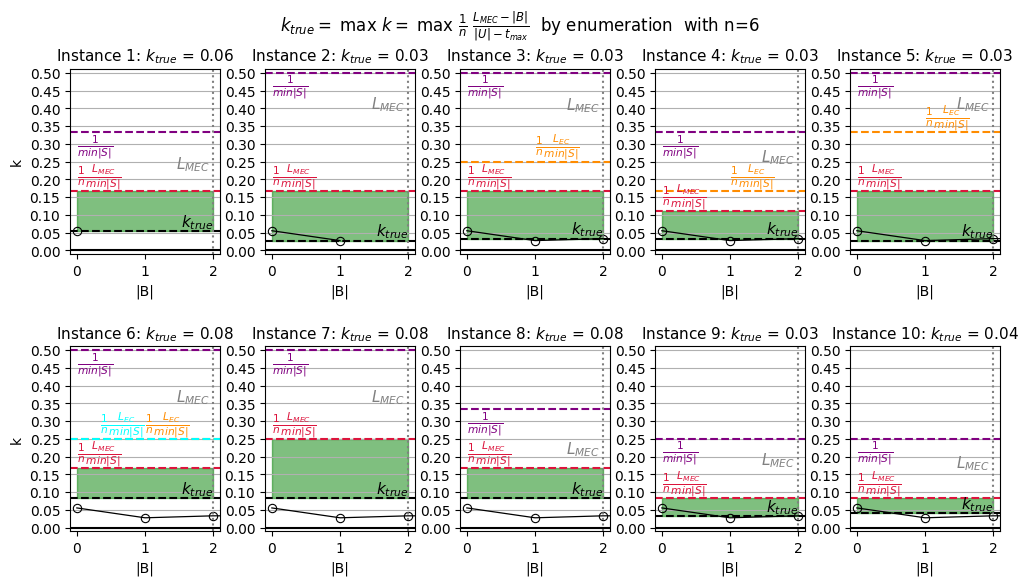


k_n_list [0.25, 0.3333333333333333, 0.2, 0.25, 0.16666666666666666, 0.25, 0.25, 0.3333333333333333, 0.3333333333333333, 0.25]

k_L_MEC_list [0.0625, 0.08333333333333333, 0.05, 0.0625, 0.041666666666666664, 0.09375, 0.0625, 0.08333333333333333, 0.08333333333333333, 0.09375]

k_L_EC_list_of_lists [[], [0.125], [0.075], [0.125], [], [], [], [0.125], [0.16666666666666666], []]

k_true_list [0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.025, 0.03125, 0.041666666666666664, 0.03125, 0.017857142857142856, 0.03125, 0.05]

k_best_list [0.0625, 0.125, 0.075, 0.125, 0.041666666666666664, 0.09375, 0.0625, 0.125, 0.16666666666666666, 0.09375]


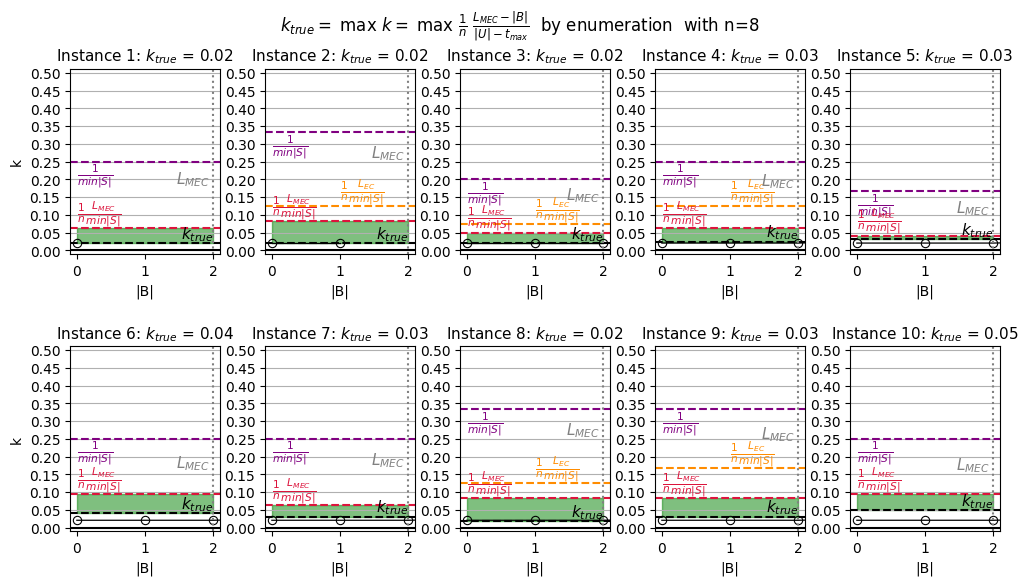


k_n_list [0.2, 0.2, 0.2, 0.16666666666666666, 0.2, 0.2, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]

k_L_MEC_list [0.04, 0.04, 0.06, 0.03333333333333333, 0.04, 0.04, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]

k_L_EC_list_of_lists [[0.06], [0.06, 0.06], [0.08], [0.05], [0.06], [0.06, 0.06], [0.05], [0.05], [0.05], [0.05]]

k_true_list [0.014285714285714285, 0.014285714285714285, 0.04, 0.014285714285714285, 0.014285714285714285, 0.0125, 0.014285714285714285, 0.0125, 0.01111111111111111, 0.014285714285714285]

k_best_list [0.06, 0.06, 0.08, 0.05, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]


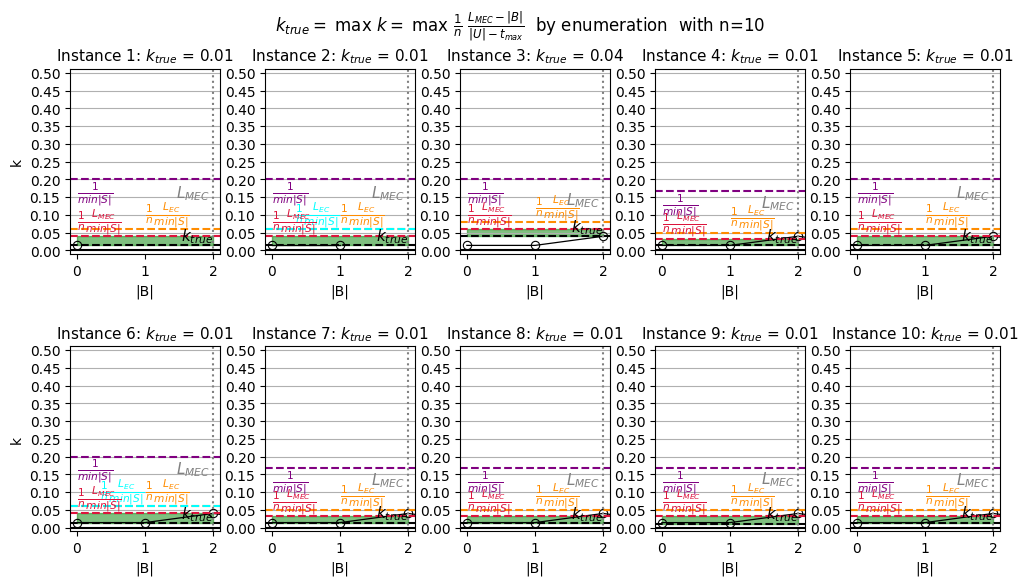

In [71]:
for n in [6,8,10]:
    trova_k_per_tutte_le_istanze(n, plot=True)

In [70]:
def trova_k_per_tutte_le_istanze(n, plot=True):
    if plot:
        fig = plt.figure(figsize=(12,6))
        fig.suptitle(r"$ k_{true} = $ max $k = $ max $\frac{1}{n}$ $\frac{L_{MEC} - |B|}{|U| - t_{max}}$  by enumeration  with n=%d" %n)

    k_n_list = []
    k_L_EC_list = []
    k_L_MEC_list = []
    k_true_list = []
    k_best_list = []
    k_L_EC_list_of_lists = []
    
    for instance in range(1,10+1):
        # print("\n\n"+"#"*20)
        # print(instance)
        
        k_n, k_L_MEC, k_L_EC_list, k_true, k_best = trova_k(n, instance)
        # print("k_n, k_L_MEC, k_L_EC_list, k_true, k_best =", k_n, k_L_MEC, k_L_EC_list, k_true, k_best)
        
        k_n_list.append(k_n)
        k_L_EC_list_of_lists.append(k_L_EC_list)
        k_L_MEC_list.append(k_L_MEC)
        k_true_list.append(k_true)
        k_best_list.append(k_best)
        

        if plot:
            ####################################
            ### PLOT
            ax = fig.add_subplot(2,5,instance)
            ax.plot(np.arange(len(k_true_list)), k_true_list, color = 'k', linestyle = 'solid', linewidth=0.9,
                     marker="o", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8, label='k(|B|)')
    
            
            ### RIGHE ORIZZONTALI
            N = 11 # fontsize
            
            colors = iter(["darkorange",  "cyan", "blue", "pink"])      
            position = iter(['left', 'right', 'center'])
            for k_L_EC in k_L_EC_list:
                c = next(colors)
                ha = next(position)
                ax.axhline(y=k_L_EC, color=c, linestyle = '--', linewidth=1.5, label=r"$\frac{1}{n}\frac{L_{EC}}{min |S|}$")
                x = L_MEC/2
                y = k_L_EC
                plt.text(x, y, r"$\frac{1}{n}\frac{L_{EC}}{min |S|}$", fontsize=N, color=c, va='bottom', ha=ha, backgroundcolor='None')
    
    
            
            ax.axhline(y=k_n, color = 'purple', linestyle = '--', linewidth=1.5, label=r"$\frac{1}{min |S|}$")
            x = 0
            y = k_n
            plt.text(x, y, r"$\frac{1}{min |S|}$", fontsize=N, color="purple", va='top', ha='left', backgroundcolor='None')
           
            
            ax.axhline(y=k_L_MEC, color = 'crimson', linestyle = '--', linewidth=1.5, label=r"$\frac{1}{n}\frac{L_{MEC}}{min |S|}$")
            x = 0
            y = k_L_MEC
            plt.text(x, y, r"$\frac{1}{n}\frac{L_{MEC}}{min |S|}$", fontsize=N, color="crimson", va='bottom', ha='left', backgroundcolor='None')
    
    
            ax.axhline(y=k_true, color = 'k', linestyle = '--', linewidth=1.5) 
            x = L_MEC
            y = k_true
            plt.text(x, y, "$k_{true}$", fontsize=N, color="k", va='bottom', ha='right', backgroundcolor='None')
    
            
            ax.axvline(x=L_MEC, color = 'grey', linestyle = 'dotted', linewidth=1.5, label='$L_{MEC}$')
            x = L_MEC - 0.05
            y = (ax.get_ylim()[1]-k_true)/(1.2)
            plt.text(x, y, '$L_{MEC}$', fontsize=N, color="grey", va='center', ha='right', backgroundcolor='None')
    
            
            ax.axhline(y=0, color = 'k', linestyle = 'solid', linewidth=1.5)
            # plt.text(x, k_piu_piccolo_possibile, 'limite minimo (basic)', fontsize=9, color="b", va='center', ha='center', backgroundcolor='w')    
    
            
            ### RETTANGOLO CHE MI DICE DOVE POSSO SCEGLIERE K
            rect = Rectangle((0,k_true), L_MEC, k_L_MEC-k_true, 
                              color='green', alpha=0.5)
            ax.add_patch(rect)
            
            
            ### TICKS AS NATURAL NUMBERS
            ax.xaxis.set_major_locator(MultipleLocator(1))
            ax.yaxis.set_major_locator(MultipleLocator(0.05))
    
            ax.grid(axis='y')
            ax.set_xlabel("|B|")
            ax.set_xlim(-0.1,L_MEC+0.1)
            ax.set_ylim(-0.01,0.5+0.01)
            ax.set_title(f"Instance {instance}: $k_{{true}}$ = {round(k_true, 2)}", fontsize=N)    
            
            if instance%5 == 1: ax.set_ylabel("k")
            # if instance == 5: plt.legend(bbox_to_anchor=(1.05, 0.7), loc='upper left')

    print("\nk_n_list = ", k_n_list)
    # print("\nk_L_EC_list",k_L_EC_list)
    print("\nk_L_MEC_list = ",k_L_MEC_list)
    print("\nk_L_EC_list_of_lists = ", k_L_EC_list_of_lists)
    print("\nk_true_list = ",k_true_list)
    print("\nk_best_list = ",k_best_list)
    
    if plot:
        fig.subplots_adjust(wspace=0.3, hspace=0.5)
        plt.show()
        


In [44]:

n = 6
instance = 3
k_n, k_L_MEC, k_L_EC_list, k_true, k_best = trova_k(n, instance)
print(k_n, k_L_MEC, k_L_EC_list, k_true, k_best)

0.5 0.16666666666666666 [0.25] 0.03333333333333333 0.25


## In che modo cambiare L influenza il rapporto? 
##### Creo un dizionario in cui: 
##### per ogni dimensione,
##### per ogni istanza, 
##### per 3 diversi L,
##### calcolo per enumerazione il rapporto.
I diversi L sono:

0) L=n, 
1) L=lunghezza dell'EC più grande, 
2) L=lunghezza MEC.

In [6]:
d_all_dimensions = {}
for n in [6,8,10]:
    d_fixed_dimension = {}
    for instance in range(1,10+1):
        ks_for_fixed_instance = []
        
        ### Build the instance.
        U, subsets_dict = define_instance(n, instance, verbose=False)
        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
        # build_instance_graph(subsets)
        
        #####################################
        ### Find feasible states.
        _, _, states_feasible, energies_feasible, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
        MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
        
        # print("EXACT_COVERS:", EXACT_COVERS)
        # print("MEC:", MEC)
        
        L_EC = [e.count("1") for e in EXACT_COVERS]
        
        ###################################### 
        ### CALCOLO 3 VOLTE IL RAPPORTO:

        for L in [n, max(L_EC), min(L_EC)]:
            k = (L / min(lengths)) / n
            ks_for_fixed_instance.append(k)
            
        d_fixed_dimension[instance] = ks_for_fixed_instance
    d_all_dimensions[n] = d_fixed_dimension
d_all_dimensions

{6: {1: [0.3333333333333333, 0.16666666666666666, 0.16666666666666666],
  2: [0.5, 0.16666666666666666, 0.16666666666666666],
  3: [0.5, 0.25, 0.16666666666666666],
  4: [0.3333333333333333, 0.16666666666666666, 0.1111111111111111],
  5: [0.5, 0.3333333333333333, 0.16666666666666666],
  6: [0.5, 0.25, 0.16666666666666666],
  7: [0.5, 0.25, 0.25],
  8: [0.3333333333333333, 0.16666666666666666, 0.16666666666666666],
  9: [0.25, 0.08333333333333333, 0.08333333333333333],
  10: [0.25, 0.08333333333333333, 0.08333333333333333]},
 8: {1: [0.25, 0.0625, 0.0625],
  2: [0.3333333333333333, 0.125, 0.08333333333333333],
  3: [0.2, 0.075, 0.05],
  4: [0.25, 0.125, 0.0625],
  5: [0.16666666666666666, 0.041666666666666664, 0.041666666666666664],
  6: [0.25, 0.09375, 0.09375],
  7: [0.25, 0.0625, 0.0625],
  8: [0.3333333333333333, 0.125, 0.08333333333333333],
  9: [0.3333333333333333, 0.16666666666666666, 0.08333333333333333],
  10: [0.25, 0.09375, 0.09375]},
 10: {1: [0.2, 0.06, 0.04],
  2: [0.2, 0.

##### Plot del contenuto del dizionario

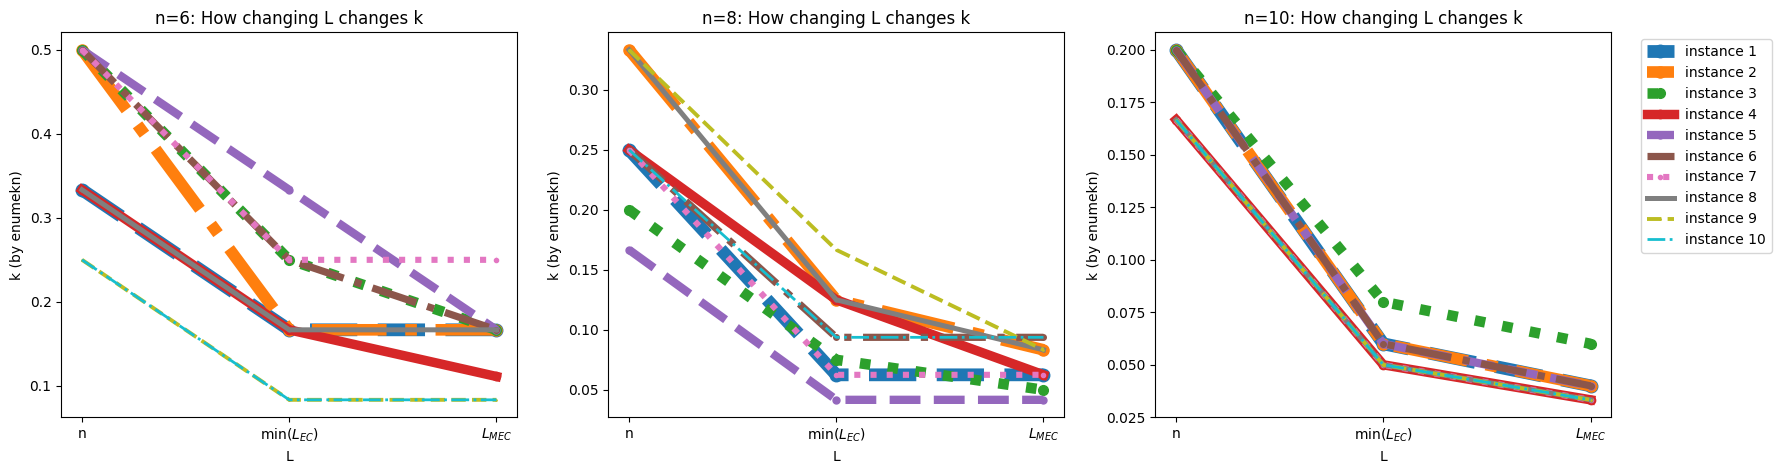

In [7]:
plt.figure(figsize=(20,5))

for num_subplot,n in enumerate([6,8,10]):
    
    plt.subplot(1,3,num_subplot+1)
    plt.title(f"n={n}: How changing L changes k")
    
    for instance,k_list in d_all_dimensions[n].items(): # guardo le istanze a dimensione 6
        
        ##### BUILD THE INSTANCE
        U, subsets_dict = define_instance(n, instance, verbose=False)
        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
    
        ##### PLOT
        x_ticks = np.arange(1, len(k_list)+1)
        lw = 10 - 8*instance/10
        ls = ['-','--','-.',':'][instance%4]
        plt.plot(x_ticks, k_list, linestyle=ls, linewidth=lw,
                 marker="o", markersize=10-instance, markeredgewidth=1,
                 label=f"instance {instance}")
        
    plt.xticks(x_ticks, ["n", "min($L_{EC}$)", "$L_{MEC}$"])
    plt.xlabel("L")
    plt.ylabel("k (by enumekn)")
    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Come varia il rapporto al variare delle istanze, delle dimensioni e di L?
##### Creo un dizionario in cui: 
##### per ogni dimensione,
##### per ogni L (L=n, L=lunghezza dell'EC più grande, L=lunghezza MEC)
##### ho una lista lunga 10 con il rapporto calcolato per ogni istanza.

In [8]:
d = {}
for n in [6,8,10]:
    d[n] = {"L=n": [k_list[0] for k_list in d_all_dimensions[n].values()], 
                      "L=max(L_EC)": [k_list[1] for k_list in d_all_dimensions[n].values()],
                      "L=L_MEC": [k_list[2] for k_list in d_all_dimensions[n].values()]}
d

{6: {'L=n': [0.3333333333333333,
   0.5,
   0.5,
   0.3333333333333333,
   0.5,
   0.5,
   0.5,
   0.3333333333333333,
   0.25,
   0.25],
  'L=max(L_EC)': [0.16666666666666666,
   0.16666666666666666,
   0.25,
   0.16666666666666666,
   0.3333333333333333,
   0.25,
   0.25,
   0.16666666666666666,
   0.08333333333333333,
   0.08333333333333333],
  'L=L_MEC': [0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.1111111111111111,
   0.16666666666666666,
   0.16666666666666666,
   0.25,
   0.16666666666666666,
   0.08333333333333333,
   0.08333333333333333]},
 8: {'L=n': [0.25,
   0.3333333333333333,
   0.2,
   0.25,
   0.16666666666666666,
   0.25,
   0.25,
   0.3333333333333333,
   0.3333333333333333,
   0.25],
  'L=max(L_EC)': [0.0625,
   0.125,
   0.075,
   0.125,
   0.041666666666666664,
   0.09375,
   0.0625,
   0.125,
   0.16666666666666666,
   0.09375],
  'L=L_MEC': [0.0625,
   0.08333333333333333,
   0.05,
   0.0625,
   0.041666666666666664,
   0.09375,
   0

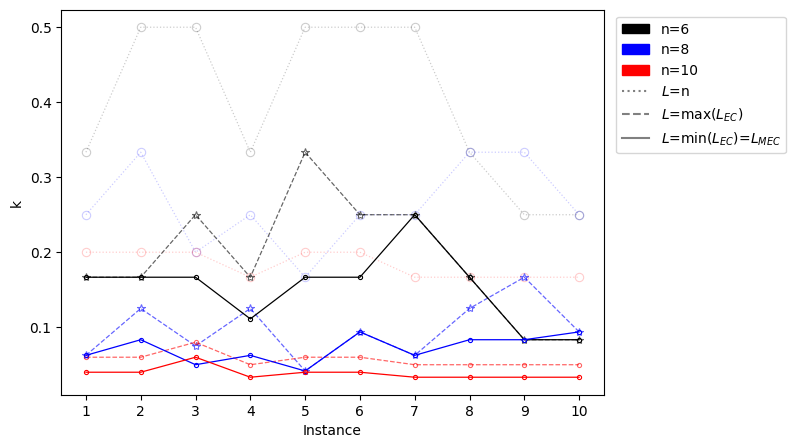

In [9]:
### PLOT
plt.figure(figsize=(7,5))
x = np.arange(1, 11)
plt.ylabel("k")
plt.xlabel("Instance")

### QUELLI CON L = n
alpha = 0.2
linestyle = 'dotted'
plt.plot(x, d[6]["L=n"], color = 'k', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=n"], color = 'b', linestyle=linestyle, linewidth=0.9,  alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=n"], color = 'r', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_1 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=n')

### QUELLI CON L = LUNGHEZZA DELL'EC PIU' GRANDE
alpha = 0.6
linestyle = 'dashed'
plt.plot(x, d[6]["L=max(L_EC)"], color = 'k', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="*", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=max(L_EC)"], color = 'b', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="*", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=max(L_EC)"], color = 'r', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_2 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=max($L_{EC}$)')

### QUELLI CON L = LUNGHEZZA DELLA MEC
alpha = 1
linestyle = 'solid'
plt.plot(x, d[6]["L=L_MEC"], color = 'k', linestyle=linestyle, linewidth=0.9,  label = "n=6",alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=L_MEC"], color = 'b', linestyle=linestyle, linewidth=0.9, label = "n=8", alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=L_MEC"], color = 'r', linestyle=linestyle, linewidth=0.9,  label = "n=10", alpha=alpha,
         marker=".", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_3 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=min($L_{EC}$)=$L_{MEC}$')


### LEGEND
k_Patch = Patch(color='k', label="n=6")
b_Patch = Patch(color='b', label="n=8")
r_Patch = Patch(color='r', label="n=10")

plt.legend(handles=[k_Patch, b_Patch, r_Patch, line_1, line_2, line_3],
           bbox_to_anchor=(1.01, 1.0), loc='upper left')

### TICKS AS NATURAL NUMBERS
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()


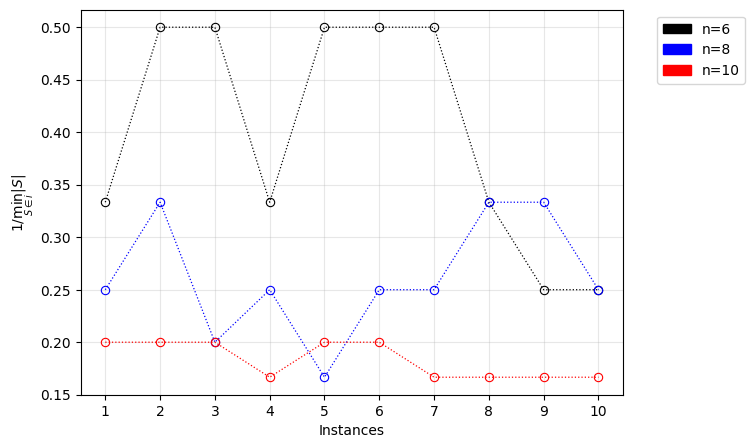

In [10]:
### PLOT
plt.figure(figsize=(7,5))
x = np.arange(1, 11)
plt.ylabel("$1/\min_{S\in i} |S|$")
plt.xlabel("Instances")

### QUELLI CON L = n
alpha = 1
linestyle = 'dotted'
plt.plot(x, d[6]["L=n"], color = 'k', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='k', markeredgewidth=0.8)
plt.plot(x, d[8]["L=n"], color = 'b', linestyle=linestyle, linewidth=0.9,  alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='b', markeredgewidth=0.8)
plt.plot(x, d[10]["L=n"], color = 'r', linestyle=linestyle, linewidth=0.9, alpha=alpha,
         marker="o", markerfacecolor="None", markeredgecolor='r', markeredgewidth=0.8)
line_1 = Line2D([], [], color='grey', linestyle=linestyle,
                          markersize=15, label='$L$=n')


### LEGEND
k_Patch = Patch(color='k', label="n=6")
b_Patch = Patch(color='b', label="n=8")
r_Patch = Patch(color='r', label="n=10")

plt.legend(handles=[k_Patch, b_Patch, r_Patch],
           bbox_to_anchor=(1.05, 1.0), loc='upper left')

### TICKS AS NATURAL NUMBERS
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.grid(alpha=0.3)
plt.show()

In [11]:
d[6]

{'L=n': [0.3333333333333333,
  0.5,
  0.5,
  0.3333333333333333,
  0.5,
  0.5,
  0.5,
  0.3333333333333333,
  0.25,
  0.25],
 'L=max(L_EC)': [0.16666666666666666,
  0.16666666666666666,
  0.25,
  0.16666666666666666,
  0.3333333333333333,
  0.25,
  0.25,
  0.16666666666666666,
  0.08333333333333333,
  0.08333333333333333],
 'L=L_MEC': [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.1111111111111111,
  0.16666666666666666,
  0.16666666666666666,
  0.25,
  0.16666666666666666,
  0.08333333333333333,
  0.08333333333333333]}

In [12]:
# import pandas as pd

# plt.figure(figsize=(15,5))

# colors = {}
# for i,n in enumerate([6,8,10]):
#     plt.subplot(1,3,i+1)
#     dictionary = d[n]
#     x, y = zip(*dictionary.items()) 
#     lineObjects = plt.plot(x,y, marker='o', linestyle="--", linewidth=1)
#     plt.legend(iter(lineObjects), np.arange(len(y[0])))

## Parte due: che succede se invece di usare tutti gli stati feasible ne uso solo alcuni?

In [11]:
from itertools import combinations, groupby
from more_itertools import distinct_permutations

def get_all_subsets(a_list):
    """
    Finds all the possible subsets of a_list.
    
    Parameters
    ----------
        a_list (list or set): the list or set to use.
    
    Return
    ------
        A list containing all the subsets of a_list.
    """
    subset_list = []
    for i in range(len(a_list) + 1):
       subset_list.extend(combinations(a_list, i))
    return [set(subset) for subset in subset_list if len(subset)>0]

def all_equal(iterable):
    """
    Checks if all elements of one iterable are the same.
    
    Parameters
    ----------
        iterable (iterable): the iterable.
    
    Return
    ------
        True if all elements of the iterable are the same, 
        False otherwise
    """
    g = groupby(iterable)
    return next(g, True) and not next(g, False)


### Fisso L e guardo diversi sottoinsiemi che k producono
##### Lascia scommentato solo FIXED_L_string che ti interessa !!! 

### Fixing L to n ... ###


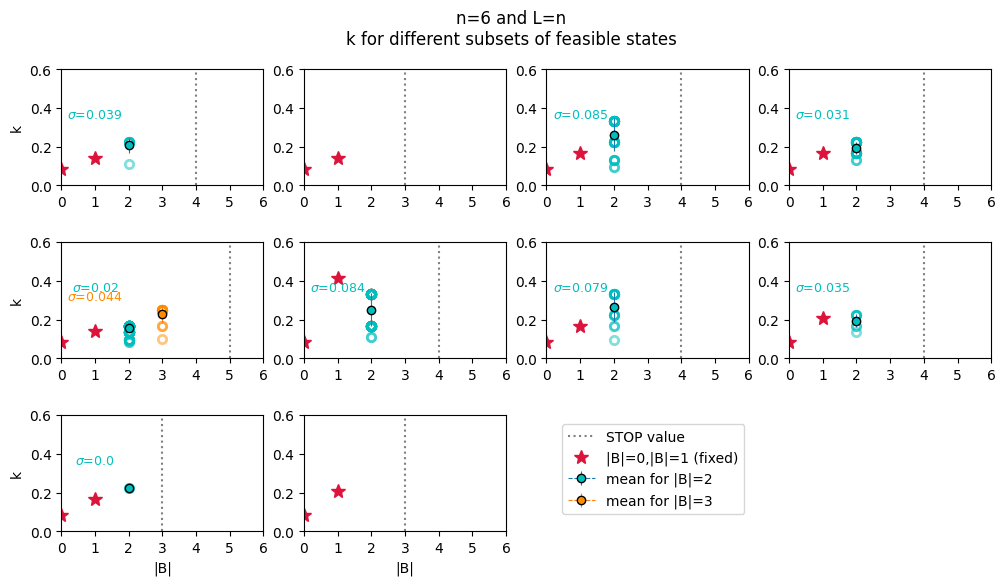

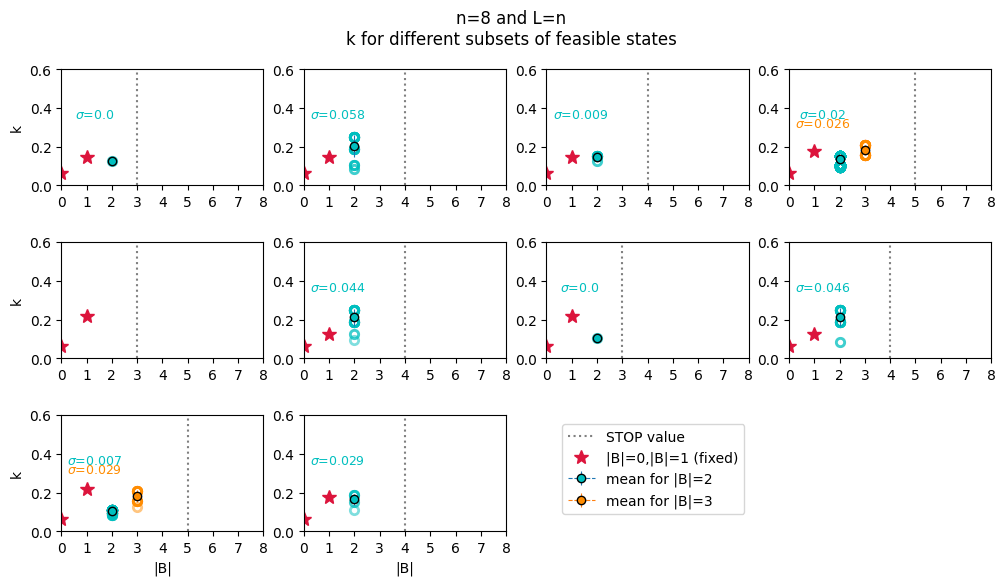

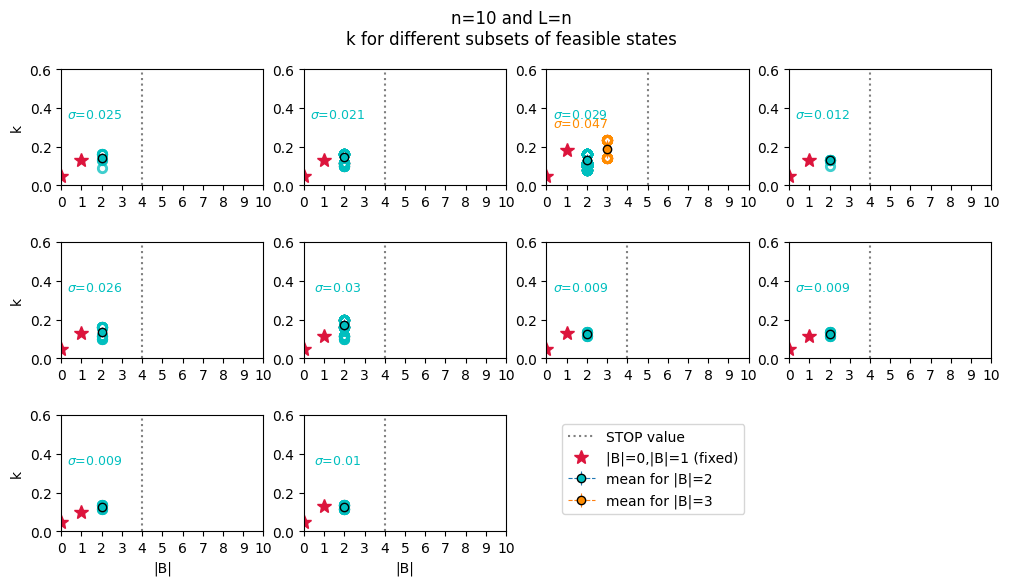

In [12]:
# FIXED_L_string = "min($L_{EC}$)"
# FIXED_L_string  = "max($L_{EC}$)"
FIXED_L_string  = "n"
print(f"### Fixing L to {FIXED_L_string} ... ###")

#############################################################################################

for n in [6,8,10]:
    fig = plt.figure(figsize=(12,6))
    plt.suptitle(f"n={n} and L={FIXED_L_string}\nk for different subsets of feasible states")
    
    for instance in range(1, 11):
        ### Build the instance.
        U, subsets_dict = define_instance(n, instance, verbose=False)

        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
        # build_instance_graph(subsets)
            
        #####################################
        ### Find feasible states.
        
        _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
        
        MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
        
        # print("EXACT_COVERS:", EXACT_COVERS)
        # print("MEC:", MEC)
        
        # print("\nAll feasible states:", states_feasible)
        
        #####################################
        ### The L_EC are the lengths of the exact covers.
        L_EC = [e.count("1") for e in EXACT_COVERS]

        if FIXED_L_string == "min($L_{EC}$)":
            FIXED_L = min(L_EC) ## se prende proprio la MEC
        elif FIXED_L_string == "max($L_{EC}$)":
            FIXED_L = max(L_EC) ## se prende la EC più grande
        else:
            FIXED_L = n
        
        #####################################
        ### PRIMA RIORDINO IN BASE AL NUMERO DI "1"
        how_many_ones = lambda x: x.count("1")
        states_feasible_ordered = sorted(states_feasible, key=how_many_ones)
        
        ### POI RAGGRUPPO IN BASE AL NUMERO DI "1"
        # print("\nRAGGRUPPO IN BASE AL NUMERO DI '1'")
        states_feasible_grouped = dict()
        for key, group in groupby(states_feasible_ordered, how_many_ones):
            states_feasible_grouped[key] = list(group)
        # print(states_feasible_grouped)
        
        
        #########################################
        ### BUILD THE DICTIONARY CONTAINING ks
        #########################################
        
        ks_for_every_num_of_ones = dict()

        ### Set the stopping value.
        ### max_B_of_instance is the maximumm number of ones that an instance has:
        ### if FIXED_L is bigger, for example when FIXED_L=n, then there's no reason 
        ### to keep on enumerating after max_B_of_instance
        max_B_of_instance =  max(states_feasible_grouped.keys())
        
        if FIXED_L > max_B_of_instance:
            STOP = max_B_of_instance + 1
        elif FIXED_L < max_B_of_instance or FIXED_L == max_B_of_instance:
            STOP = FIXED_L # if num_of_ones==FIXED_L, the k is 0 
                           # so we don't have to compute it.
        # print(FIXED_L, max_B_of_instance, "-->", STOP)
        
        devst_dict = dict()
        for num_of_ones in range(STOP):
            # print(f"\n### num_of_ones={num_of_ones} ###\n")
            
            #### These are computed in every case since every instance has
            #### the zero-state and the one-states.
            if(num_of_ones == 0 or num_of_ones == 1):
                states = states_feasible_grouped[num_of_ones]
                k_list = find_k_enumerating_given_B_and_L(states, U, subsets, FIXED_L, 
                                                  min_B=num_of_ones, max_B=num_of_ones)
                if k_list != []:
                    ks_for_every_num_of_ones[num_of_ones] = k_list[0] # since it only has one element
    
        
            #### For higher num_of_ones: let's see how the k 
            #### estimate changes when we take different subsets. 
            else:
                ks_for_every_num_of_ones[num_of_ones] = []
                for sub in get_all_subsets(states_feasible_grouped[num_of_ones]):
                    # print(sub)
                    k_list = find_k_enumerating_given_B_and_L(sub, U, subsets, FIXED_L, 
                                                      min_B=num_of_ones, max_B=num_of_ones)
                    if k_list != []:
                        ks_for_every_num_of_ones[num_of_ones].append(k_list[0])
     
                
                    # else:
                    #     print(f"Empty! Maybe only an EC has {num_of_ones} '1'",
                    #           "sub:", sub, 
                    #           "EC:", EXACT_COVERS)
        
                #### If, for a specific num_of_ones, no k is found 
                #### (for example if for that num_of_ones we only have an exact cover), 
                #### then remove that num_of_ones.
                if ks_for_every_num_of_ones[num_of_ones] == []:
                    ks_for_every_num_of_ones.pop(num_of_ones)
                
                else:
                    devst_dict[num_of_ones] = np.std(ks_for_every_num_of_ones[num_of_ones])
                    
        # print(ks_for_every_num_of_ones)
        # print(devst_dict)
        
################################################################################
################################## PLOT ########################################
################################################################################
        
        ks = ks_for_every_num_of_ones
        
        ax = fig.add_subplot(3,4,instance)

        ### plot |B|=0 and |B|=1
        ax.errorbar([0,1], [ks[0], ks[1]], marker='*', color='crimson', linestyle="None",markersize=10, label="|B|=0,|B|=1 (fixed)")

        ### Use different markers for |B|>1
        if FIXED_L > 2:
            colors = iter(["c", "darkorange", "indigo"])
            for num_of_ones,k_list in list(ks.items())[2:]:
                c = next(colors)
                ax.plot(num_of_ones, [k_list], marker='o', color=c, linestyle="dashed", linewidth=0.8,
                         markerfacecolor="None", markeredgecolor=c, markeredgewidth=2, alpha=0.5)
                ax.errorbar(x=num_of_ones, y=np.mean(k_list), yerr=np.std(k_list),marker='o', 
                             markerfacecolor=c, markeredgecolor='k',linestyle="dashed", linewidth=0.8, alpha=1, label=f"mean for |B|={num_of_ones}")
                plt.text((1/6)*n, 0.5-0.05*num_of_ones, f'$\sigma$={round(devst_dict[num_of_ones],3)}', fontsize=9, color=c,
                 va='top', ha='center', backgroundcolor='None')

        ### Stop line
        ax.axvline(STOP, linestyle='dotted', color="grey", label='STOP value')
        

        ### Ticks as integers and limits
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_ylim(0,0.6)
        ax.set_xlim(0,n)

        ### Bellurie
        if instance%4 == 1:
            ax.set_ylabel("k")
        if instance>8:
            ax.set_xlabel("|B|")

    ### Set only one legend containing everything
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(line_label, []) for line_label in zip(*lines_labels)]
    # creating a dict we can get unique keys:
    legend_dict = dict(zip(labels, lines)) 
    unique_labels =  list(legend_dict.keys()) # grab unique labels
    unique_lines = list(legend_dict.values())
    fig.legend(unique_lines, unique_labels, scatterpoints=1, bbox_to_anchor=[0.7, 0.3])
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.49)
    plt.show()

### Fixing L to max($L_{EC}$) ... ###

istanza 1

istanza 2

istanza 3

istanza 4

istanza 5

istanza 6

istanza 7

istanza 8

istanza 9

istanza 10
[0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.3333333333333333, 0.25, 0.25, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]


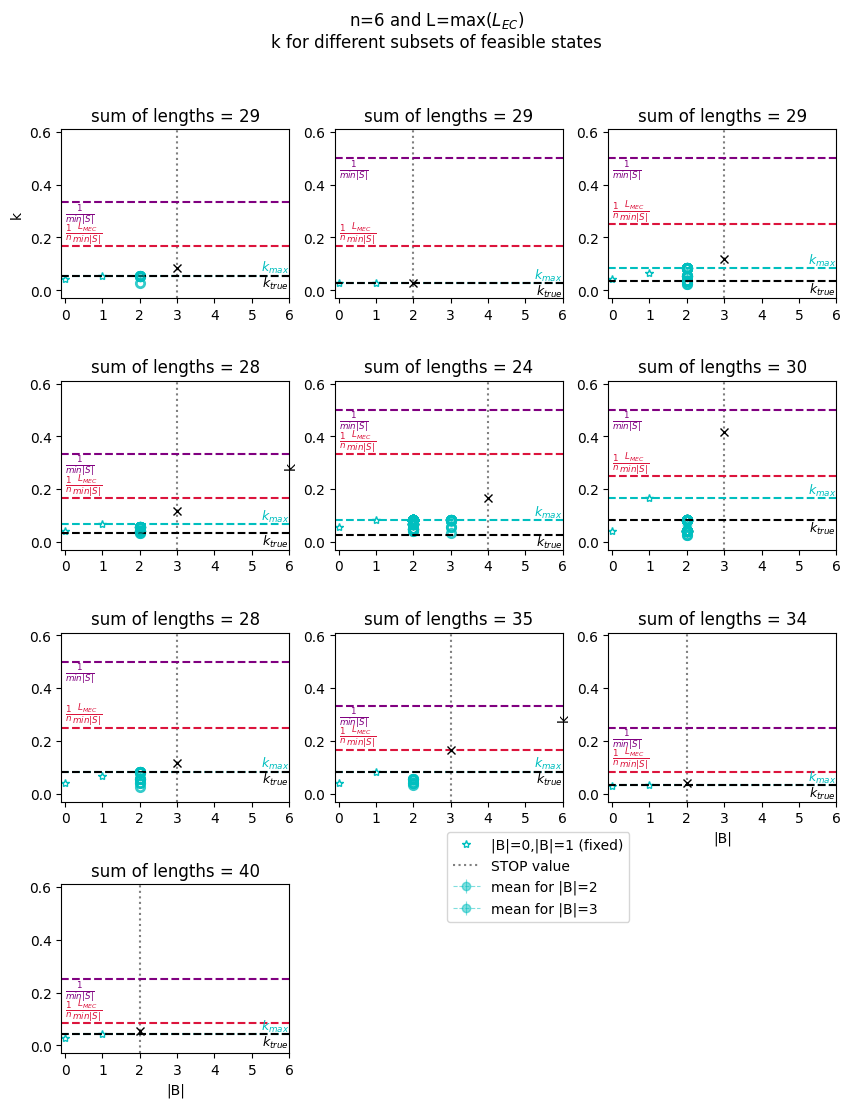


istanza 1

istanza 2

istanza 3

istanza 4

istanza 5

istanza 6

istanza 7

istanza 8

istanza 9

istanza 10
[0.0625, 0.125, 0.075, 0.125, 0.041666666666666664, 0.09375, 0.0625, 0.125, 0.16666666666666666, 0.09375]


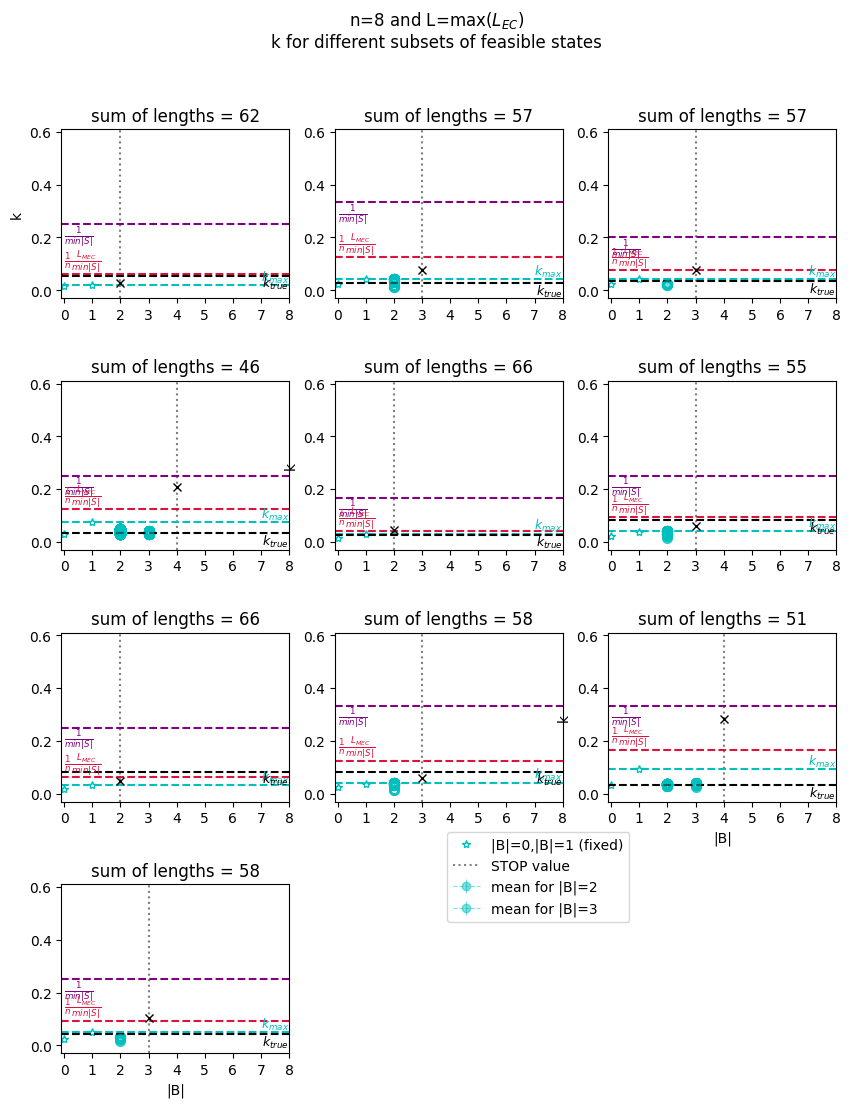


istanza 1

istanza 2
{'0010010010'} 0.03333333333333333
{'0111000000'} 0.02
{'1011000000'} 0.02
{'1101000000'} 0.02
{'1110000000'} 0.02
{'0000010110', '0010010010'} 0.03333333333333333
{'0000010110', '0111000000'} 0.02
{'0000010110', '1011000000'} 0.02
{'0000010110', '1101000000'} 0.02
{'0000010110', '1110000000'} 0.02
{'0111000000', '0010010010'} 0.03333333333333333
{'1011000000', '0010010010'} 0.03333333333333333
{'0010010010', '1101000000'} 0.03333333333333333
{'1110000000', '0010010010'} 0.03333333333333333
{'1011000000', '0111000000'} 0.02
{'0111000000', '1101000000'} 0.02
{'1110000000', '0111000000'} 0.02
{'1011000000', '1101000000'} 0.02
{'1110000000', '1011000000'} 0.02
{'1110000000', '1101000000'} 0.02
{'0000010110', '0111000000', '0010010010'} 0.03333333333333333
{'0000010110', '1011000000', '0010010010'} 0.03333333333333333
{'0000010110', '0010010010', '1101000000'} 0.03333333333333333
{'0000010110', '0010010010', '1110000000'} 0.03333333333333333
{'0000010110', '1011000000

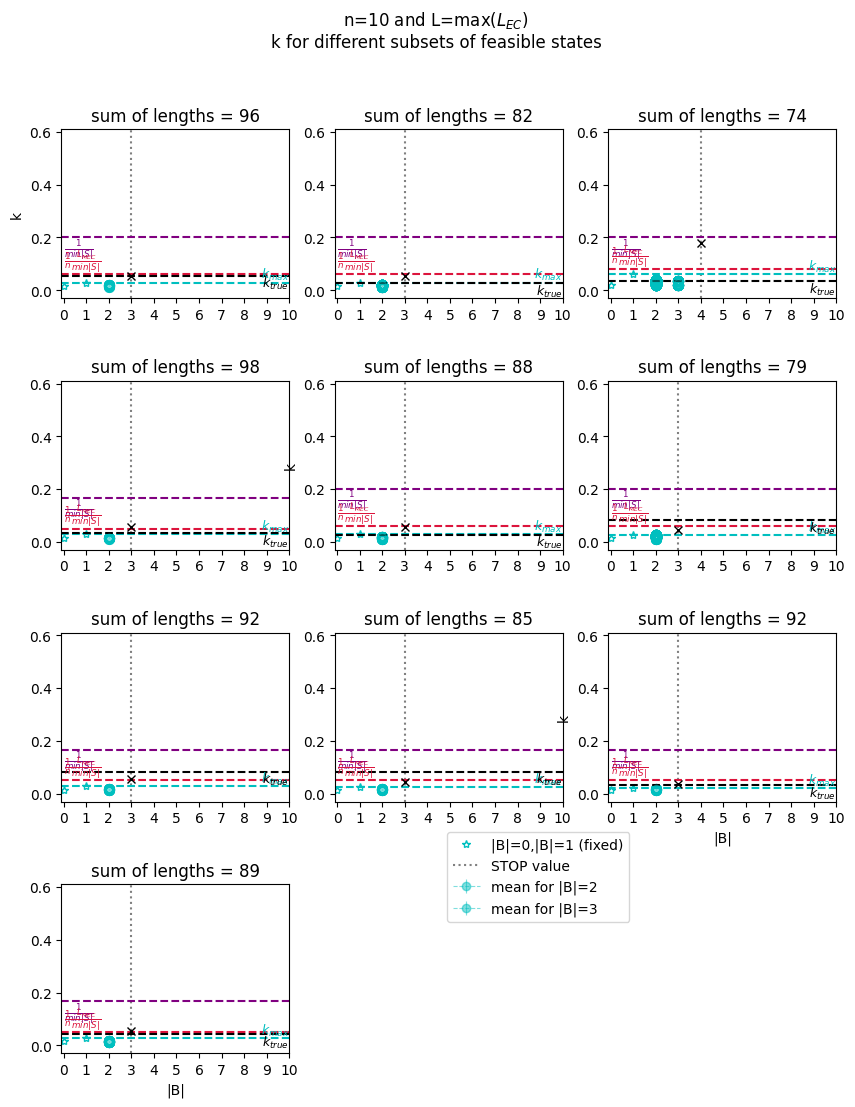

In [13]:
# FIXED_L_string = "min($L_{EC}$)"
FIXED_L_string  = "max($L_{EC}$)"
# FIXED_L_string  = "n"
print(f"### Fixing L to {FIXED_L_string} ... ###")

for n in [6,8,10]:
    fig = plt.figure(figsize=(10,12))
    plt.tight_layout()
    plt.suptitle(f"n={n} and L={FIXED_L_string}\nk for different subsets of feasible states")
    k_conoscendo_L_list = []
    for instance in range(1, 11):
        ### Build the instance.
        U, subsets_dict = define_instance(n, instance, verbose=False)

        subsets = list(subsets_dict.values())
        lengths = [len(s) for s in subsets]
        # build_instance_graph(subsets)
            
        #####################################
        ### Find feasible states.
        
        _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
        
        MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
        
        # print("EXACT_COVERS:", EXACT_COVERS)
        
        # print("\nAll feasible states:", states_feasible)
        
        #####################################
        ### The L_EC are the lengths of the exact covers.
        L_EC = [e.count("1") for e in EXACT_COVERS]

        if FIXED_L_string == "min($L_{EC}$)":
            FIXED_L = min(L_EC) ## se prende proprio la MEC
        elif FIXED_L_string == "max($L_{EC}$)":
            FIXED_L = max(L_EC) ## se prende la EC più grande
        else:
            FIXED_L = n
        
        #####################################
        ### PRIMA RIORDINO IN BASE AL NUMERO DI "1"
        how_many_ones = lambda x: x.count("1")
        states_feasible_ordered = sorted(states_feasible, key=how_many_ones)
        
        ### POI RAGGRUPPO IN BASE AL NUMERO DI "1"
        # print("\nRAGGRUPPO IN BASE AL NUMERO DI '1'")
        states_feasible_grouped = dict()
        for key, group in groupby(states_feasible_ordered, how_many_ones):
            states_feasible_grouped[key] = list(group)
        # print(states_feasible_grouped)
        
        
        #########################################
        ### BUILD THE DICTIONARY CONTAINING kS
        #########################################
        
        ks_for_every_num_of_ones = dict()

        ### Set the stopping value.
        ### max_B_of_instance is the maximumm number of ones that an instance has:
        ### if FIXED_L is bigger, for example when FIXED_L=n, then there's no reason 
        ### to keep on enumerating after max_B_of_instance
        max_B_of_instance =  max(states_feasible_grouped.keys())
        
        if FIXED_L > max_B_of_instance:
            STOP = max_B_of_instance + 1
        elif FIXED_L < max_B_of_instance or FIXED_L == max_B_of_instance:
            STOP = FIXED_L # if num_of_ones==FIXED_L, the k is 0 
                           # so we don't have to compute it.
        # print(FIXED_L, max_B_of_instance, "-->", STOP)
        
        devst_dict = dict()
        for num_of_ones in range(STOP):
            # print(f"\n### num_of_ones={num_of_ones} ###\n")
            
            #### These are computed in every case since every instance has
            #### the zero-state and the one-states.
            if(num_of_ones == 0 or num_of_ones == 1):
                states = states_feasible_grouped[num_of_ones]
                k_list = find_k_enumerating_given_B_and_L(states, U, subsets, FIXED_L, 
                                                  min_B=num_of_ones, max_B=num_of_ones)
                if k_list != []:
                    ks_for_every_num_of_ones[num_of_ones] = k_list[0] # since it has only one element
    
        
            #### For higher num_of_ones: let's see how the k 
            #### estimate changes when we take different subsets. 
            else:
                ks_for_every_num_of_ones[num_of_ones] = []
                for sub in get_all_subsets(states_feasible_grouped[num_of_ones]):
                    
                    k_list = find_k_enumerating_given_B_and_L(sub, U, subsets, FIXED_L, 
                                                      min_B=num_of_ones, max_B=num_of_ones)
                    if k_list != []:
                        ks_for_every_num_of_ones[num_of_ones].append(k_list[0])
                        if num_of_ones==3 and instance==3: print(sub, k_list[0])
     
                
                    # else:
                    #     print(f"Empty! Maybe only an EC has {num_of_ones} '1'",
                    #           "sub:", sub, 
                    #           "EC:", EXACT_COVERS)
        
                #### If, for a specific num_of_ones, no k is found 
                #### (for example if for that num_of_ones we only have an exact cover), 
                #### then remove that num_of_ones.
                if ks_for_every_num_of_ones[num_of_ones] == []:
                    ks_for_every_num_of_ones.pop(num_of_ones)
                
                else:
                    devst_dict[num_of_ones] = np.std(ks_for_every_num_of_ones[num_of_ones])
                    
        # print(ks_for_every_num_of_ones)
        # print(devst_dict)
        
################################################################################
################################## PLOT ########################################
################################################################################
        
        ks = ks_for_every_num_of_ones
        fontsize = 9
        ax = fig.add_subplot(4,3,instance)

        ### plot |B|=0 and |B|=1
        ax.plot([0,1], [ks[0], ks[1]], linestyle='None', marker='*', markerfacecolor='None', markeredgecolor='c', 
                label="|B|=0,|B|=1 (fixed)")
        # ax.axline(xy1=(0, ks[0]), xy2=(1, ks[1]), color='k', linestyle='solid', linewidth=0.7) # extend a line between two points
        slope, intercept = np.polyfit([0,1], [ks[0], ks[1]], 1)
        extrapolated_estimate = intercept + STOP*slope
        ax.errorbar(STOP, extrapolated_estimate, marker="x", color='k')
        # ax.axhline(extrapolated_estimate, linestyle='--', color="b", label='Estimate' )
        # plt.text((2/3)*n, 0.5-0.02+0.05*1, f'estimated:{round(extrapolated_estimate,2)}', fontsize=9, color="indigo",
        #          va='top', ha='center', backgroundcolor='None')

        
        ### Use different markers for |B|>1
        if FIXED_L > 2:
            colors = iter(["c", "c", "indigo"])
            for num_of_ones,k_list in list(ks.items())[2:]:
                c = next(colors)
                ax.plot(num_of_ones, [k_list], marker='o', color=c, linestyle="dashed", linewidth=0.8,
                         markerfacecolor="None", markeredgecolor=c, markeredgewidth=2, alpha=0.8)
                ax.errorbar(x=num_of_ones, y=np.mean(k_list), yerr=np.std(k_list),marker='o', 
                             color=c, linestyle="dashed", linewidth=0.8, alpha=0.5, label=f"mean for |B|={num_of_ones}")
                # x = num_of_ones+0.2
                # y = np.mean(k_list)-np.std(k_list)
                # text = f'$\sigma$={round(devst_dict[num_of_ones],4)}'
                # plt.text(x, y, text, fontsize=9, color=c,
                #  va='top', ha='left', backgroundcolor='None')

        
        ### Stop line
        ax.axvline(STOP, linestyle='dotted', color="grey", label='STOP value')
        

        ### Bellurie
        ax.title.set_text(f'sum of lengths = {sum(lengths)}')
        if instance%4 == 1:
            ax.set_ylabel("k")
        if instance>8:
            ax.set_xlabel("|B|")

        
        ### Plot k_max 
        k_max = max([max(k) if isinstance(k, list) 
                            else k for k in ks.values()])
        plt.axhline(k_max, linestyle='--', color="c") 
        plt.text(n, k_max, f'$k_{{max}}$', fontsize=N, color="c",
                 va='bottom', ha='right', backgroundcolor='None')


        ### Plot k_n 
        k_n = 1/min(lengths)
        ax.axhline(y=k_n, color = 'purple', linestyle = '--', linewidth=1.5)
        x = 0
        y = k_n
        text = r"$\frac{1}{min |S|}$"
        plt.text(x, y, text, fontsize=N, color="purple", va='top', ha='left', backgroundcolor='None')

        
        k_conoscendo_L = (FIXED_L/min(lengths)) / n
        ax.axhline(y=k_conoscendo_L, color = 'crimson', linestyle = '--', linewidth=1.5)
        x = 0
        y = k_conoscendo_L
        text =  r"$\frac{1}{n}\frac{L_{MEC}}{min |S|}$" 
        plt.text(x, y, text, fontsize=N, color="crimson", va='bottom', ha='left', backgroundcolor='None')

   
        ### RETTANGOLO CHE MI DICE SE LA STIMA VA BENE
        # attenzione: se non arrotondo cambia il risultato dell' if/else sotto
        # k_max = round(k_max, 6) 
        # extrapolated_estimate= round(extrapolated_estimate, 6)
        # if extrapolated_estimate < k_max:
        #     ax.patch.set_facecolor('red')
        #     ax.patch.set_alpha(0.1)
        #     print("extrapolated_estimate, k_max:",extrapolated_estimate, k_max)
        # else:
        #     ax.patch.set_facecolor('green')
        #     ax.patch.set_alpha(0.1)


        # k_n= round(k_n, 6)
        # mean_estimate = np.mean([extrapolated_estimate, k_n])
        # if instance == 3:
        #     print(round(mean_estimate,6))
        # plt.axhline(mean_estimate, linestyle='dotted', color="g", label='mean')

        k_true_dict = dict()
        k_true_dict[6] = [0.05555555555555555, 0.027777777777777776, 0.03333333333333333, 0.03333333333333333, 0.027777777777777776, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.03333333333333333, 0.041666666666666664]
        k_true_dict[8] = [0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.025, 0.03125, 0.041666666666666664, 0.03125, 0.017857142857142856, 0.03125, 0.05]
        k_true_dict[10] = [0.014285714285714285, 0.014285714285714285, 0.04, 0.014285714285714285, 0.014285714285714285, 0.0125, 0.014285714285714285, 0.0125, 0.01111111111111111, 0.014285714285714285]

        k_true = k_true_dict[6][instance-1]
        ax.axhline(y=k_true, color = 'k', linestyle = '--', linewidth=1.5) 
        # x = L_MEC - 0.1
        # y = ax.get_ylim()[1]*(1/20) + k_true
        x = n
        y = k_true
        plt.text(x, y, "$k_{true}$", fontsize=N, color="k", va='top', ha='right', backgroundcolor='None')


        ### Ticks as integers and limits
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.set_ylim(-0.03,0.61)
        ax.set_xlim(-0.1,n)
        print(f"\nistanza {instance}")
        # print(f"k_n = {k_n}\nk_conoscendo_L = {k_conoscendo_L}\nk_max = {k_max}\nk_true = {k_true}")

        k_conoscendo_L_list.append(k_conoscendo_L)
    print(k_conoscendo_L_list)
    ### Set only one legend containing everything
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(line_label, []) for line_label in zip(*lines_labels)]
    legend_dict = dict(zip(labels, lines)) # creating a dict we get unique keys
    unique_labels =  list(legend_dict.keys()) # grab unique labels
    unique_lines = list(legend_dict.values())
    fig.legend(unique_lines, unique_labels, scatterpoints=1, bbox_to_anchor=[0.7, 0.3])

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.49)
    plt.show()

[0.167, 0.167, 0.251, 0.167, 0.333, 0.251, 0.251, 0.167, 0.083, 0.083]


#### bassa sum(lengths) -> pallini blu ( |B| maggiori ) e dispersione un po piu grande

In [15]:
# ### k_0 E k_1 LI POSSO CALCOLARE ANCHE SENZA DWAVE QUINDI BASTA VEDERE COME CAMBIA IL CALCOLO DI k_2, ..., k_L

# all_zero_state = {'0'*n}
# zero_and_one = one_one_states| all_zero_state 
# k_true_0 = find_k_enumerating_given_B_and_L(all_zero_state, U, subsets, min(L_EC), max_B=0)

# string = '0'*(n-1) + '1'
# one_one_states = set(["".join(elem) for elem in distinct_permutations(string)])
# k_true_1 = find_k_enumerating_given_B_and_L(one_one_states, U, subsets, min(L_EC), min_B=0, max_B=1)

In [16]:
#  ### Find feasible states.
# n = 6
# instance = 5

# ### Build the instance.
# U, subsets_dict = define_instance(n, instance, verbose=False)
# _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
# subsets = list(subsets_dict.values())
# MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
# print(subsets)
# print("EXACT_COVERS:", EXACT_COVERS)
# print("MEC:", MEC)

# #####################################
# ### PRIMA RIORDINO IN BASE AL NUMERO DI "1"
# how_many_ones = lambda x: x.count("1")
# states_feasible_ordered = sorted(states_feasible, key=how_many_ones)

# ### POI RAGGRUPPO IN BASE AL NUMERO DI "1"
# # print("\nRAGGRUPPO IN BASE AL NUMERO DI '1'")
# states_feasible_grouped = dict()
# for key, group in groupby(states_feasible_ordered, how_many_ones):
#     states_feasible_grouped[key] = list(group)

# pprint.pprint(states_feasible_grouped)

In [17]:
# n = 10
# instance = 5

# ### Build the instance.
# U, subsets_dict = define_instance(n, instance, verbose=False)
# _, _, states_feasible, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)
# subsets = list(subsets_dict.values())
# lengths = [len(s) for s in subsets]
# print(subsets, "\n", lengths, "\n\n")

# ### RIORDINO IN BASE ALLA LUNGHEZZA
# subsets2, lengths2 = zip(*sorted(zip(subsets, lengths), key=lambda x: x[1]))
# print(subsets2, "\n", lengths2, "\n\n")
